## Model Training

#### Importing Data and Necessary Libraries



### Importing dataset

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [82]:
df = pd.read_csv('data/cleaned_dataset.csv')
data = df.copy()

In [83]:
df.shape

(23469, 24)

In [84]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
0,7315233705,https://omaha.craigslist.org/ctd/d/fremont-201...,omaha / council bluffs,https://omaha.craigslist.org,36995,2013.0,ram,2500,good,6 cylinders,...,3C6UR5DL5DG584817,4wd,pickup,black,https://images.craigslist.org/00o0o_bp0dB4eW2i...,2013 Ram 2500 Crew Cab Big Horn Pickup 4D 6 1/...,ia,41.424186,-96.499908,2021-05-01T07:32:52-0500
1,7306636389,https://tricities.craigslist.org/cto/d/bristol...,tri-cities,https://tricities.craigslist.org,10000,2011.0,bmw,550i,good,6 cylinders,...,1FMJU1JT1HEA52352,4wd,sedan,grey,https://images.craigslist.org/00w0w_53YhtQfYp5...,This car is in good condition. Runs and drives...,tn,36.568600,-82.181900,2021-04-14T10:12:48-0400
2,7316498014,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,34990,2018.0,jeep,grand cherokee trailhawk,good,6 cylinders,...,1C4RJFLG1JC138453,4wd,other,black,https://images.craigslist.org/00202_7MHlVPbgCs...,Carvana is the safer way to buy a car During t...,sc,34.830000,-82.370000,2021-05-03T19:22:00-0400
3,7311169521,https://oklahomacity.craigslist.org/cto/d/hebe...,oklahoma city,https://oklahomacity.craigslist.org,6000,1964.0,chevrolet,shortbed,good,6 cylinders,...,1FMJU1JT1HEA52352,4wd,sedan,white,https://images.craigslist.org/00a0a_4W3LC9j87R...,1964 Chevy short bed step side rolling body. ...,ok,35.510300,-92.039200,2021-04-22T20:24:36-0500
4,7310457441,https://yakima.craigslist.org/ctd/d/kittitas-2...,yakima,https://yakima.craigslist.org,12988,2007.0,toyota,highlander,excellent,6 cylinders,...,1FMJU1JT1HEA52352,4wd,sedan,white,https://images.craigslist.org/00f0f_iKWWuC1aUz...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-21T11:26:09-0700


In [98]:
columns_to_drop = ['url','lat','drive','cylinders','type''title_status','long','paint_color','manufacturer','model','id', 'region_url', 'VIN', 'image_url', 'description', 'state', 'region', 'posting_date']

# Drop columns from df
df = df.drop(columns=columns_to_drop, axis=1)

KeyError: "['url', 'lat', 'typetitle_status', 'long', 'paint_color', 'manufacturer', 'model', 'id', 'region_url', 'VIN', 'image_url', 'description', 'state', 'region', 'posting_date'] not found in axis"

In [ ]:
df

In [87]:
mode = df['cylinders'].mode().iloc[0]
df['cylinders'] = pd.to_numeric(df['cylinders'].str.replace(' cylinders', ''), errors='coerce').fillna(mode)


In [88]:
df

,price,year,condition,cylinders,fuel,odometer,transmission,drive,type
0,36995,2013.0,good,6.0,diesel,133863.0,automatic,4wd,pickup
1,10000,2011.0,good,6.0,gas,112000.0,manual,4wd,sedan
2,34990,2018.0,good,6.0,gas,37509.0,other,4wd,other
3,6000,1964.0,good,6.0,gas,72812.0,manual,4wd,sedan
4,12988,2007.0,excellent,6.0,gas,91510.0,automatic,4wd,sedan
...,...,...,...,...,...,...,...,...,...
23464,2990,2004.0,good,8.0,gas,254000.0,automatic,4wd,SUV
23465,22500,2002.0,good,6.0,gas,98368.0,manual,4wd,pickup
23466,9997,2011.0,excellent,6.0,gas,109646.0,automatic,rwd,sedan
23467,16590,2017.0,good,6.0,gas,35599.0,other,fwd,sedan


In [89]:
from sklearn.preprocessing import OrdinalEncoder
# Replace categories
df['condition'] = df['condition'].replace(['Fair', 'Good', 'Excellent'], ['fair', 'good', 'excellent'])
df['condition'] = np.where(df['condition'].isin(['fair', 'good', 'excellent']), df['condition'], 'good')

# Get unique values in the 'condition' column
unique_conditions = np.unique(df['condition'])

# Define the ordinal encoding mapping
condition_mapping = [list(unique_conditions)]

# Create an OrdinalEncoder object
encoder = OrdinalEncoder(categories=condition_mapping)

# Fit and transform the 'condition' variable
df['condition'] = encoder.fit_transform(df['condition'].values.reshape(-1, 1))

In [90]:
df

,price,year,condition,cylinders,fuel,odometer,transmission,drive,type
0,36995,2013.0,2.0,6.0,diesel,133863.0,automatic,4wd,pickup
1,10000,2011.0,2.0,6.0,gas,112000.0,manual,4wd,sedan
2,34990,2018.0,2.0,6.0,gas,37509.0,other,4wd,other
3,6000,1964.0,2.0,6.0,gas,72812.0,manual,4wd,sedan
4,12988,2007.0,0.0,6.0,gas,91510.0,automatic,4wd,sedan
...,...,...,...,...,...,...,...,...,...
23464,2990,2004.0,2.0,8.0,gas,254000.0,automatic,4wd,SUV
23465,22500,2002.0,2.0,6.0,gas,98368.0,manual,4wd,pickup
23466,9997,2011.0,0.0,6.0,gas,109646.0,automatic,rwd,sedan
23467,16590,2017.0,2.0,6.0,gas,35599.0,other,fwd,sedan


In [91]:
df

,price,year,condition,cylinders,fuel,odometer,transmission,drive,type
0,36995,2013.0,2.0,6.0,diesel,133863.0,automatic,4wd,pickup
1,10000,2011.0,2.0,6.0,gas,112000.0,manual,4wd,sedan
2,34990,2018.0,2.0,6.0,gas,37509.0,other,4wd,other
3,6000,1964.0,2.0,6.0,gas,72812.0,manual,4wd,sedan
4,12988,2007.0,0.0,6.0,gas,91510.0,automatic,4wd,sedan
...,...,...,...,...,...,...,...,...,...
23464,2990,2004.0,2.0,8.0,gas,254000.0,automatic,4wd,SUV
23465,22500,2002.0,2.0,6.0,gas,98368.0,manual,4wd,pickup
23466,9997,2011.0,0.0,6.0,gas,109646.0,automatic,rwd,sedan
23467,16590,2017.0,2.0,6.0,gas,35599.0,other,fwd,sedan


### Preparing X and Y Variables

In [92]:
X = df.drop(columns=['price'],axis=1)

In [93]:
X.shape

(23469, 8)

In [94]:
y = df['price']

In [95]:
y

0        36995
1        10000
2        34990
3         6000
4        12988
         ...  
23464     2990
23465    22500
23466     9997
23467    16590
23468    20590
Name: price, Length: 23469, dtype: int64

### Column Transformation

In [96]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')
df['drive'] = pd.to_numeric(df['drive'], errors='coerce')


df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').astype(str)
df['fuel'] = pd.to_numeric(df['fuel'], errors='coerce').astype(str)
df['transmission'] = pd.to_numeric(df['transmission'], errors='coerce').astype(str)
df['type'] = pd.to_numeric(df['type'], errors='coerce').astype(str)


In [97]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [62]:
num_features

Index(['year', 'condition', 'odometer'], dtype='object')

In [63]:
cat_features

Index(['cylinders', 'fuel', 'transmission', 'drive', 'type'], dtype='object')

#### Importing necessary Libraries for Preprocessing and carrying out Preprocessing

In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [65]:
numerical_features = ['year', 'odometer', 'condition']
categorical_features = ['cylinders', 'fuel', 'transmission', 'drive', 'type']

X['condition'] = X['condition'].astype(int)
X['odometer'] = X['odometer'].astype(int)
X['year'] = X['year'].astype(int)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Scale numerical features to integers
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
ohe = OneHotEncoder()
X[categorical_features] = X[categorical_features].astype(str)
X_categorical = ohe.fit_transform(X[categorical_features]).toarray()

# Combine numerical and categorical features
X_transformed = np.concatenate((X[numerical_features], X_categorical), axis=1)

In [67]:
print(X.dtypes)

year            float64
condition       float64
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
dtype: object


In [68]:
X_num = X.select_dtypes(include=[np.number])

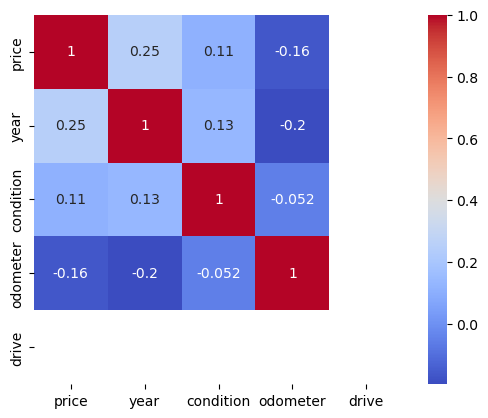

In [69]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

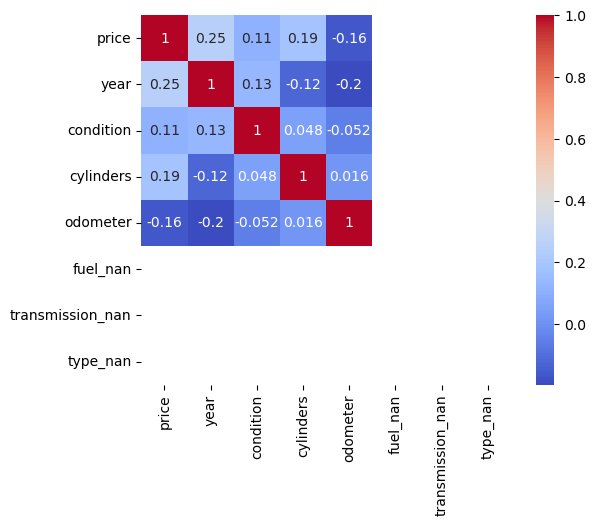

In [71]:
# One-hot encode the categorical variables
encoded_df = pd.get_dummies(df, columns=['fuel', 'transmission', 'drive', 'type'])

# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [73]:
# Get the categorical columns
categorical_features = [ 'fuel', 'transmission', 'drive', 'type']

# Extract unique values for each categorical column
unique_values_dict = {col: df[col].unique() for col in categorical_features}

# Print the unique values, including all nan values
for col, unique_values in unique_values_dict.items():
    nan_values = df[col][df[col].isnull()].values
    unique_values = np.concatenate((unique_values, nan_values))
    print(f"Unique values in {col}: {unique_values}")

Unique values in fuel: ['nan']
Unique values in transmission: ['nan']
Unique values in drive: [nan nan nan ... nan nan nan]
Unique values in type: ['nan']


In [75]:
df.nunique()

price            3564
year               96
condition           3
cylinders           8
fuel                1
odometer        14977
transmission        1
drive               0
type                1
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
import pandas as pd



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating an Evaluation Function to give metrics after model training

In [80]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assume X and y are your dataset and target variable

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# One-hot encode categorical features
X_encoded = preprocessor.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define models and pipeline
models = {
    "Linear Regression": Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('svd', TruncatedSVD(n_components=10)), ('lr', LinearRegression())]),
    "Lasso": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('lasso', Lasso())]),
    "Ridge": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('ridge', Ridge())]),
    "K-Neighbors Regressor": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('knn', KNeighborsRegressor())]),
    "Decision Tree": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('dt', DecisionTreeRegressor())]),
    "Random Forest Regressor": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('rf', RandomForestRegressor())]),
    "XGBRegressor": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('xgb', XGBRegressor())]), 
    "CatBoosting Regressor": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('cat', CatBoostRegressor(verbose=False))]),
    "AdaBoost Regressor": Pipeline([('imputer', SimpleImputer(strategy='mean')), ('svd', TruncatedSVD(n_components=10)), ('ada', AdaBoostRegressor())])
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Define hyperparameter tuning space
    param_grid = {
    
    }

    # Define cross-validation scheme
    cv = 5

    # Define evaluation metrics
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

    # Perform hyperparameter tuning with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, refit='r2')
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters and evaluation metrics
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print("Best MSE:", -grid_search.cv_results_['mean_test_neg_mean_squared_error'][grid_search.best_index_])
    print("Best MAE:", -grid_search.cv_results_['mean_test_neg_mean_absolute_error'][grid_search.best_index_])

    # Train final model with best hyperparameters
    final_model = grid_search.best_estimator_
    final_model.fit(X_train, y_train)

    # Evaluate final model on test set
    y_pred = final_model.predict(X_test)
    print("Final R2 score:", r2_score(y_test, y_pred))
    print("Final MSE:", mean_squared_error(y_test, y_pred))
    print("Final MAE:", mean_absolute_error(y_test, y_pred))
    
    print(list(models.keys())[i])

Best hyperparameters: {}
Best R2 score: 0.242270114109589
Best MSE: 283854745.27439606
Best MAE: 8808.672460415572
Final R2 score: 0.29210747320688135
Final MSE: 151271527.35174614
Final MAE: 8506.693025405617
Linear Regression
Best hyperparameters: {}
Best R2 score: 0.24227045088092458
Best MSE: 283854399.88106805
Best MAE: 8808.873855299378
Final R2 score: 0.29212348806806543
Final MSE: 151268105.09141713
Final MAE: 8506.80850357411
Lasso
Best hyperparameters: {}
Best R2 score: 0.24226961123606716
Best MSE: 283854584.77122056
Best MAE: 8808.677809867086
Final R2 score: 0.2921104350953
Final MSE: 151270894.41755348
Final MAE: 8506.691811200693
Ridge
Best hyperparameters: {}
Best R2 score: 0.312231356739734
Best MSE: 264226386.59175292
Best MAE: 6875.320372836219
Final R2 score: 0.30212460659510143
Final MSE: 149130938.19453773
Final MAE: 6869.293182786537
K-Neighbors Regressor
Best hyperparameters: {}
Best R2 score: -0.8459228642729496
Best MSE: 526482743.32115
Best MAE: 7924.27672652